# Kaggle Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud 

# Context: 

### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

# Content 

### The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days.
### It contains only numerical input variables which are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Inspiration

### Identify fraudulent credit card transactions. Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from math import floor,ceil

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc,precision_recall_curve,average_precision_score

In [3]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
counts = df['Class'].value_counts
print(f'Absolute class count\n{counts()}\n')
print(f'Class proportion\n{counts(normalize=True)}\n')

Absolute class count
0    284315
1       492
Name: Class, dtype: int64

Class proportion
0    0.998273
1    0.001727
Name: Class, dtype: float64



In [9]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

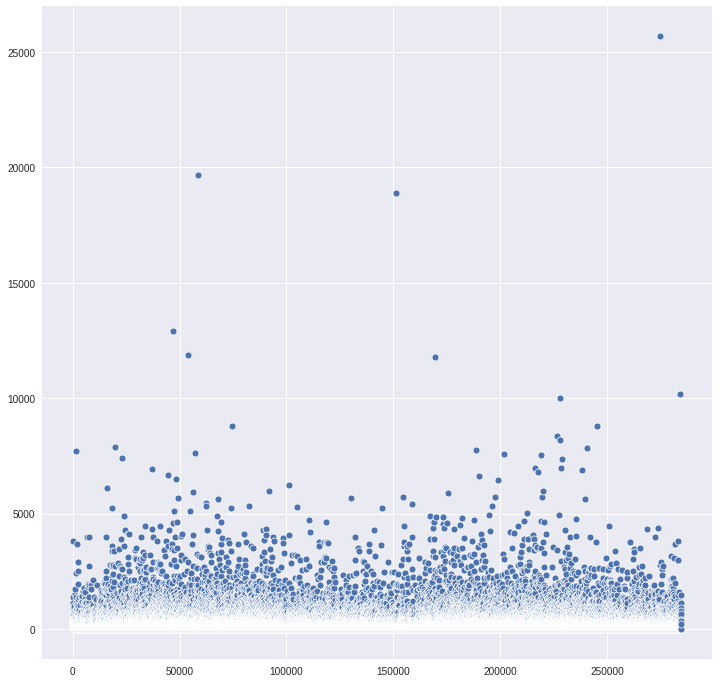

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df['Amount'])

In [13]:
amounts = []
start = 0
stop = ceil(df['Amount'].max())
step = 200
for i in range(start,stop,step):
    amounts.append(df['Amount'].between(i,i+step).sum())


In [14]:
amounts

[255970,
 16791,
 5658,
 2587,
 1559,
 968,
 585,
 378,
 290,
 224,
 123,
 86,
 84,
 74,
 49,
 47,
 33,
 35,
 30,
 26,
 21,
 19,
 9,
 11,
 8,
 3,
 7,
 2,
 7,
 4,
 2,
 1,
 2,
 2,
 5,
 0,
 1,
 3,
 3,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [15]:
amounts[0]/df.shape[0]

0.8987489773776628

## About 90% os the amounts are bellow 200 

In [16]:
df_frauds = df[df[['Amount','Class']]['Class'] == 1]

In [17]:
df_frauds['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

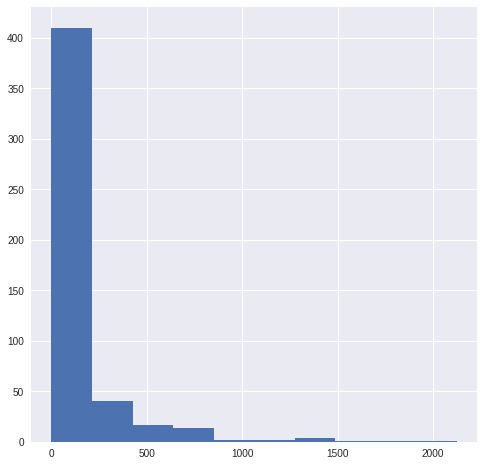

In [18]:
plt.figure(figsize=(8,8))
df_frauds['Amount'].hist()

In [19]:
amounts = []
start = 0
stop = ceil(df_frauds['Amount'].max())
step = 350
for i in range(start,stop,step):
    amounts.append(df_frauds['Amount'].between(i,i+step-1).sum())

In [20]:
amounts

[443, 25, 14, 5, 2, 1, 1]

In [21]:
amounts[0]/df_frauds.shape[0]

0.9004065040650406

## About 90% of the frauds are bellow 350 

# -------------------------------------------------------------------------------------------------------------

# Based on feature_selection

In [22]:
#(clf, X, y_true)
def auc_score(model,X_test,y_test):
    y_test_pred = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred[:,1])
    return auc(recall, precision)

In [24]:
X = df.drop(['Class','Time'],axis=1)
y = df['Class']

In [25]:
cols = ['V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V4', 'V7', 'V9']
X = X[cols]

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [61]:
scaler = MaxAbsScaler()
model = KNeighborsClassifier(n_jobs=3)
pipe = Pipeline([('scaler',scaler), 
                    ('model',model)
])

pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MaxAbsScaler(copy=True)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=3, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [62]:
auc_score(pipe,X_test,y_test)

0.8892326553222274

In [63]:
y_pred_test = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [64]:
print('Neighbors=',conf_matrix)

Neighbors= [[93826    12]
 [   26   123]]


In [65]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
print('True Negatives Forest = ',TN)
print('True Positives Forest= ', TP)
print('False Positives - Erro Tipo I Forest = ',FP)
print('False Negatives - Erro Tipo II Forest= ', FN)

True Negatives Forest =  93826
True Positives Forest=  123
False Positives - Erro Tipo I Forest =  12
False Negatives - Erro Tipo II Forest=  26


## Accuracy: Percent of predictions were correct.

In [66]:
print(pipe.score(X_train,y_train))

0.9995335918666807


In [67]:
print(pipe.score(X_test,y_test))

0.9995956887654676


## Recall(TruePositiveRate):  Percent of the positive (fraudulent) cases that were correctly predicted: $\frac{TP}{TP+FN}$

In [226]:
# Percentual dos positivos corretamente preditos

In [68]:
recall = TP/(TP+FN)
print(recall)

0.825503355704698


### Caught 80.5% of the fraudulent transactions

## Precision:  Percent of positive (fraudulent) predictions that  were correctly predicted: $\frac{TP}{TP+FP}$

In [228]:
# Percentual das predições positivas corretas, quantos dos positivos estão corretos

In [69]:
precision=TP/(TP+FP)
print(precision)

0.9111111111111111


### When it predicts that a transaction is fraudulent, is correct in 93.0% of the time 

## F1-Score:  Combines Recall and Precision to one performance metric, is usually more useful than Accuracy, especially if you have an uneven class distribution : $2 * \frac{Recall*Precision}{Recall+Precision}$

In [70]:
print(2 * ((recall*precision)/(recall+precision)))

0.8661971830985916


In [71]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.91      0.83      0.87       149

    accuracy                           1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



## FalsePositiveRate:  Percent of negative (non-fraudulent) predictions that were incorrectly predicted: $\frac{FP}{FP+TN}$

In [72]:
print(FP/(FP+TN))

0.00012787996334107717


###  Approximately 0.00959100% of the non-fraudulent transactions were classified incorrectly as fraudulent transactions.

# A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.
# Precision-Recall curves should be used when there is a moderate to large class imbalance.(our case)

In [73]:
y_test_probs = pipe.predict_proba(X_test)

In [74]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs[:,1])

In [77]:
len(thresholds)

6

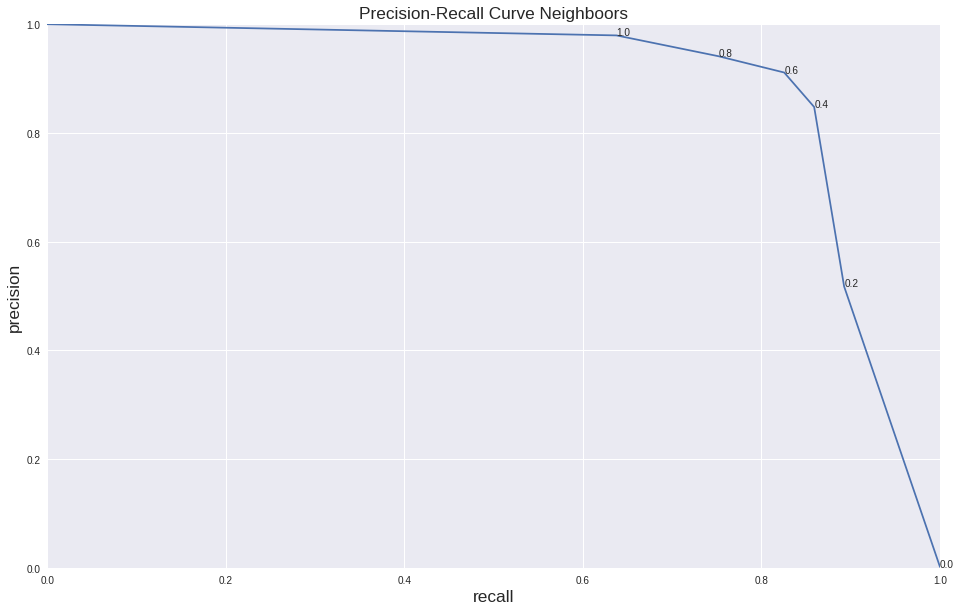

In [75]:
plt.figure(figsize=(16,10))
plt.title('Precision-Recall Curve Neighboors',size='xx-large')
plt.ylabel('precision',size='xx-large')
plt.xlabel('recall',size='xx-large')
plt.xlim((0,1))
plt.ylim((0,1))
texts = list(zip(thresholds,recall,precision))
for i in range(0,len(texts)): plt.annotate(texts[i][0], (texts[i][1], texts[i][2]))
plt.plot(recall,precision)
plt.show()

In [78]:
_auc = auc(recall, precision)
print(_auc)

0.8892326553222274


### Through the notebooks i've reached 0.88 and 0.89 in several models. I've choosen this model cause it's easier to use and faster to train.